# Columbus Metro Area and Ohio Corona Virus

I learned a lot from my previous iteration of this code, and created a new project that removes that learning and note taking to streamline and build on my COMA area project.

I found a paper that describes imporvements to the SIR model (vaccinations, death, reinfection) that I want to implement here. I also want to input actual COMA data. So I will tabulate that here.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.font_manager import FontProperties
import math
%matplotlib inline
import plotly.figure_factory as ff
import plotly.express as px
# make font legible size
font={'size':18}

matplotlib.rc('font',**font)

from urllib.request import urlopen
import json

from ipywidgets import interact, interactive,fixed
from IPython.display import clear_output,display,HTML

from matplotlib import animation

import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [105]:
OHIO=pd.read_csv('Ohio Corona- County and Day.csv')
hosp=

In [124]:
def County(OHIO,County,day):
    
    county=OHIO[OHIO['County']==County]
    data=county.iloc[0:,list(np.arange(4,day+5,1))]
    x=OHIO.columns.values.tolist()[4:day+5]
    fig, ax = plt.subplots(figsize=(9,7))
    line_c, = ax.plot(x,data.values.tolist()[0],'r-', )
    ax.set_title(f'{County} Infection over time')
    ax.set_ylabel('Cases')
    ax.set_xlabel('Days')
    ax.set_xlim(0,15)
    #ax.set_ylim(-5,1050)
    ax.xaxis.grid()
    ax.yaxis.grid()


In [100]:
def Ohio(OHIO,day):
    day=str(day)
    with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
        counties = json.load(response)

    fig=px.choropleth_mapbox(OHIO, geojson=counties, locations='FIPS',color=day,mapbox_style='carto-positron',hover_name='County', 
                             range_color=(0,150),color_continuous_scale='Reds',zoom=5.9, center = {"lat": 40, "lon": -83},
                               opacity=0.33,title='Coronavirus in Ohio')

    fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})
    fig.show()

In [102]:
w=interact(Ohio,OHIO=fixed(OHIO),day=(0,15),continous_update=False)
display(w);

interactive(children=(IntSlider(value=7, description='day', max=15), Output()), _dom_classes=('widget-interact…

<function __main__.Ohio(OHIO, day)>

In [125]:
w2=interactive(County,OHIO=fixed(OHIO),County=OHIO['County'].values.tolist(),day=fixed(15))
display(w2);

interactive(children=(Dropdown(description='County', options=('Adams', 'Allen', 'Ashland', 'Ashtabula', 'Athen…

Basic Repoduction number is 2.50 and susceptible population fraction is 1.00
2.50 is over 1: Endemic disease
2.50 is over 1 even after mitgation: Still endemic disease
peak hospitalization sickness occured on day 37.0 with 66121.0 infected



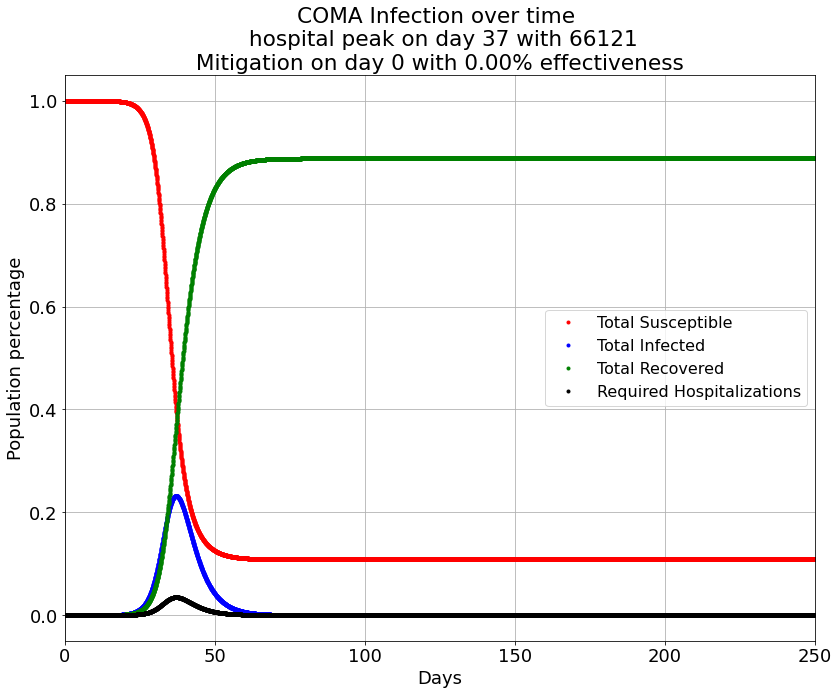

In [10]:
#population
N=N_u+N_s+N_r

#initial infected 
I_o=1
i_o=I_o/N

#initial suceptible
S_o=N-I_o

s_o=S_o/N


#initial recovered
R_o=0
r_o=R_o/N

#days out
days=250

#make time range in days with a set increment size
day_o=0
increment=days*24
time=np.linspace(day_o,days,increment+1)
#step size
step=days/(increment)

#contamination

b=.673

#recovery
k=.2693

#transit parameter
trav=0.0

#mitigate day in days
mitigate=0
off = 0
#mitigate effectiveness 1 off 0 ideal
m=1
b_m=b*m

Ro=b/k
Rom=b_m/k
check=s_o*Ro
checkm=s_o*Rom
print(f'Basic Repoduction number is {Ro:.2f} and susceptible population fraction is {s_o:.2f}')
if check >= 1:
    print(f'{check:.2f} is over 1: Endemic disease')
    if checkm >= 1:
        print(f'{checkm:.2f} is over 1 even after mitgation: Still endemic disease') 
        
    elif checkm < 1:
        print(f'{checkm:.2f} is now under 1 crisis averted') 
        
elif check <1:
    print(f'{check:.2f} is under 1: ok')
# lists to be filled with s r and i functions
s=[]
i=[]
r=[]

#loop
while day_o < days:

    #get first values using initial conditions
    if day_o==0:
        
        
        s.append(s_o)
      
        i.append(i_o)
      
        r.append(r_o)
        
    else:
        if day_o < mitigate or day_o > off:
            s_n=(s[-1])-b*(s[-1])*(i[-1])*step
            
            s.append(s_n)

            r_n=(r[-1])+k*(i[-1])*step
            
            r.append(r_n)

            i_n=(i[-1])+(b*s[-1]*i[-1]-k*i[-1])*step
            
            i.append(i_n)
        
        elif day_o >= mitigate and day_o <= off:
            
            s_n=(s[-1])-b_m*(s[-1])*(i[-1])*step
            
            s.append(s_n)

            r_n=(r[-1])+k*(i[-1])*step
            
            r.append(r_n)

            i_n=(i[-1])+(b_m*s[-1]*i[-1]-k*i[-1])*step
            
            i.append(i_n)


    day_o+=step
#get values in terms of population
S=[x*N for x in s]
I=[x*N for x in i]
R=[x*N for x in r]

# find hospital population by multiplying infected by 0.15
hosp=[x*0.15 for x in i]
HOSP=[x*N for x in hosp]


fig, ax = plt.subplots(figsize=(12,10))
line_s, = ax.plot(time,s,'r.', )
line_i,=ax.plot(time,i,'b.')
line_r,=ax.plot(time,r,'g.')
line_hosp,=ax.plot(time,hosp,'k.')

ax.set_title(f'COMA Infection over time')
ax.set_ylabel('Population percentage')
ax.set_xlabel('Days')
ax.set_xlim(0,days)
#ax.set_ylim(-5,1050)
ax.xaxis.grid()
ax.yaxis.grid()

#legend
line_s.set_label('Total Susceptible')
line_i.set_label('Total Infected')
line_r.set_label('Total Recovered')
line_hosp.set_label('Required Hospitalizations')
leg=ax.legend(fontsize=16)


#find peak hospitalization
max_val = max(HOSP)
max_idx = HOSP.index(max_val)/24

#create informative title and export figure
print(f'peak hospitalization sickness occured on day {np.floor(max_idx)} with {np.floor(max_val)} infected\n')
ax.set_title(f'COMA Infection over time \n hospital peak on day {np.floor(max_idx):.0f} with {np.floor(max_val):.0f}\n Mitigation on day {mitigate} with {(1-m)*100:.2f}% effectiveness ')
plt.tight_layout()
fig.savefig(f'figures/COMA Corona - day {mitigate} mitigation with {(1-m)*100:.2f}% effectiveness day 63 off.tif',dpi=150)

In [56]:
I[15*24]

405.2674753550172

In [58]:
32/254

0.12598425196850394